Text(0.5, 0, 'Year')

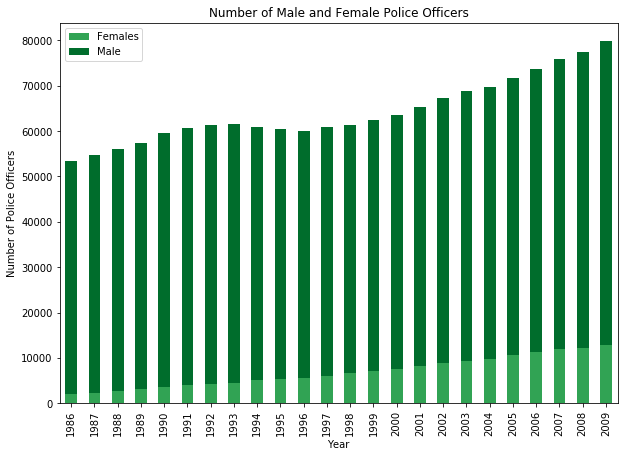

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib
import numpy as np

fig, ax = subplots()

df = pd.read_csv('data/data.csv')

#Filter the Data: Number of police officers from 1986-2009
df_geo = df[df['GEO'] == 'Canada']

gender = ['Females', 'Both sexes']
df_gender = df_geo[df_geo.Sex.isin(gender)]
df_Statistics = df_gender[df_gender['UOM'] == 'Number']

#Remove unused columns
updated_df = df_Statistics.drop(['DGUID', 'Statistics', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 
                   'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 
                   'DECIMALS', 'GEO', 'UOM'], axis = 1)


updated_df = updated_df.pivot(index='REF_DATE', columns= 'Sex', values = 'VALUE')


#print(updated_df)
colors = ["#31A354", "#006D2C"]
updated_df.loc[:,['Females','Both sexes']].plot.bar(stacked=True, color=colors, figsize=(10,7), ax=ax)
ax.legend(['Females','Male'])
plt.title('Number of Male and Female Police Officers')
plt.ylabel('Number of Police Officers')
plt.xlabel('Year')

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

#Add ablility for user to choose rank
year = '2008'
rank = 'Total number of police officers (1)'

prov = pd.read_csv('data/rank.csv')
# https://data.ontario.ca/dataset/police-officers-by-rank-and-gender

#Remove uneeded rows
prov = prov[prov.Geography != 'Canada']
prov = prov[prov.Geography != 'Northwest Territories including Nunavut']

#Get rank data
prov_rank = prov[prov.Rank == rank]

#Get just the number females
prov_females = prov_rank[prov_rank.Sex == 'Females']
prov_females.set_index(['Geography'], inplace = True)

#Get the totals
prov_total = prov_rank.groupby('Geography', as_index = True).sum()


#Make new df for the ratio to be displayed
percent = pd.DataFrame(
    index = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia','New Brunswick', 
             'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan','Alberta', 'British Columbia', 
             'Yukon Territory', 'Northwest Territories','Nunavut'], 
    columns = ['Ratio'])

for province in percent.index:
    percent.loc[province, 'Ratio'] = prov_females.loc[province, year] / prov_total.loc[province, year]

<function matplotlib.pyplot.show(*args, **kw)>

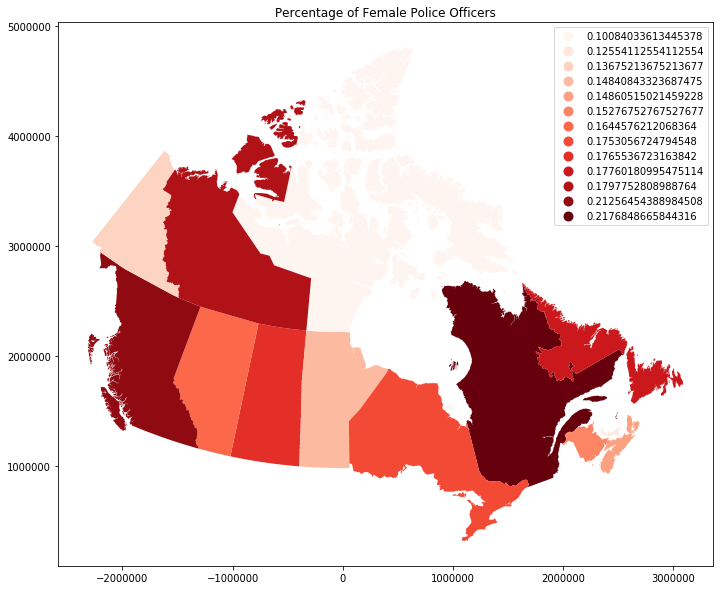

In [233]:
import geopandas
import geoplot
import matplotlib.pyplot as plt
#Map .shp from
#https://www.arcgis.com/home/item.html?id=dcbcdf86939548af81efbd2d732336db

canada = geopandas.read_file("data\Canada.shp")

canada = canada.set_index('NAME').join(percent, how = 'left')
canada.plot(column = 'Ratio', 
            figsize=(15,10), 
            legend = True, 
            cmap = 'Reds')
plt.title("Percentage of Female Police Officers")
plt.show